# 911 Calls Capstone Project

For this capstone project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Importing numpy and pandas **

In [5]:
import numpy as np
import pandas as pd

** Importing visualization libraries and set %matplotlib inline. **

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Reading in the csv file as a dataframe called df **

In [7]:
df = pd.read_csv('911.csv')

** Checking the info() of the df **

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Checking the head of df **

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [11]:
df['zip'].head(5)

0    19525.0
1    19446.0
2    19401.0
3    19401.0
4        NaN
Name: zip, dtype: float64

In [12]:
df['twp'].head(5)

0          NEW HANOVER
1    HATFIELD TOWNSHIP
2           NORRISTOWN
3           NORRISTOWN
4     LOWER POTTSGROVE
Name: twp, dtype: object

In [13]:
df['title'].nunique()

110

In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [15]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
# Here is a different solution.
df['Reason'] = df['title'].str.split(':').str.get(0)

In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [17]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now using seaborn to create a countplot of 911 calls by Reason. **

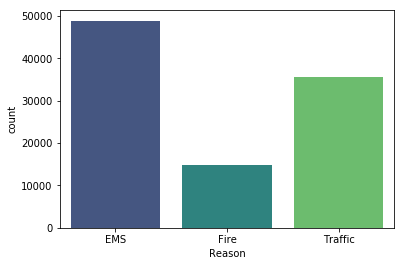

In [18]:
sns.countplot(x = 'Reason', data = df, palette = 'viridis')

___
** Now let me begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [19]:
type(df['timeStamp'].at[0])

str

** Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [20]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Now that the timestamp column are actually DateTime objects, by creating 3 new columns called Hour, Month, and Day of Week. I will create these columns based off of the timeStamp column.**

In [21]:
datetime = pd.DataFrame({'Hour': df['timeStamp'].dt.hour, 
                         'Month': df['timeStamp'].dt.month, 
                         'Day of Week': df['timeStamp'].dt.dayofweek})

In [22]:
df = pd.concat([df, datetime], axis = 1)

In [23]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


** Notice how the Day of Week is an integer 0-6. Using the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [24]:
date_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(date_map)

In [25]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


** Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

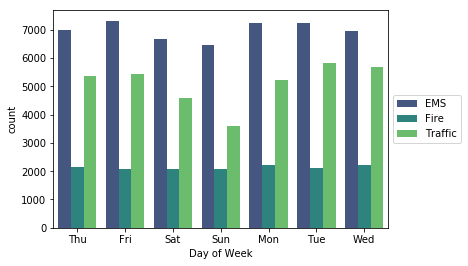

In [26]:
sns.countplot(x = 'Day of Week', data = df, hue = 'Reason', palette = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Now doing the same for Month:**

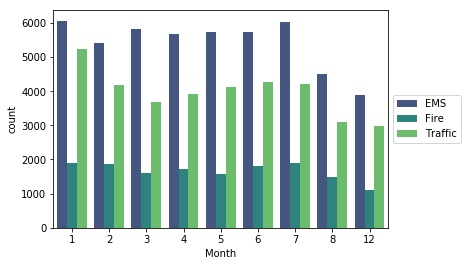

In [27]:
sns.countplot(x = 'Month', hue = 'Reason', data = df, palette = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

** Now creating a gropuby object called Month, where I group the DataFrame by the month column and use the count() method for aggregation. **

In [28]:
Month = df.groupby('Month').count()
Month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Now creating a simple plot off of the dataframe indicating the count of calls per month. **

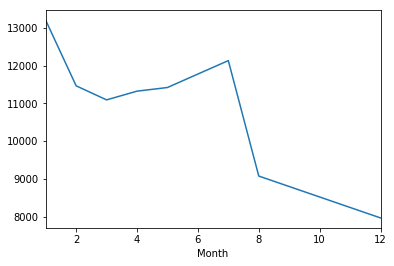

In [29]:
Month['twp'].plot()

** Now using seaborn's lmplot() to create a linear fit on the number of calls per month. **

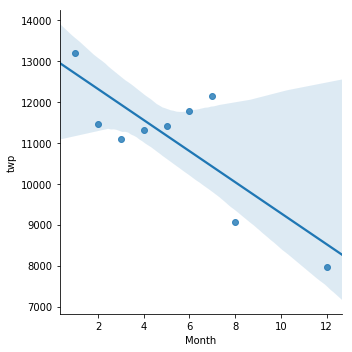

In [30]:
sns.lmplot(x = 'Month', y = 'twp', data = Month.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column.** 

In [31]:
Date = df['timeStamp'].at[0]
Date

Timestamp('2015-12-10 17:40:00')

In [32]:
Date.date()

datetime.date(2015, 12, 10)

In [33]:
df['Date'] = df['timeStamp'].apply(lambda date: date.date())

In [34]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [35]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


In [36]:
df.groupby('Date').count()['lat'].head()

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
Name: lat, dtype: int64

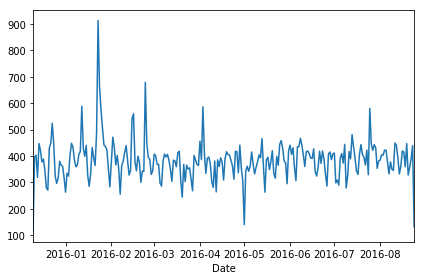

In [37]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

** Now recreating this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

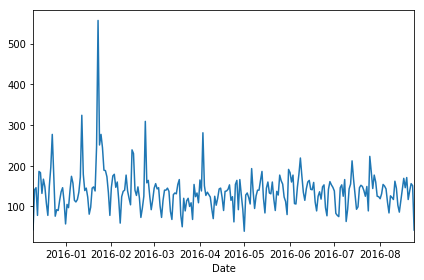

In [38]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

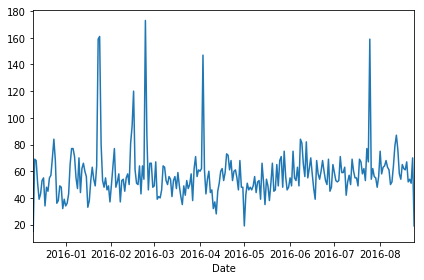

In [39]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

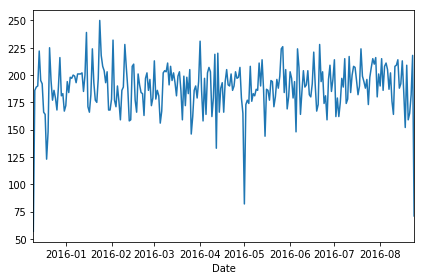

In [40]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. I'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 

In [41]:
df.groupby(by = ['Day of Week', 'Hour']).count()

lat   lng  desc  zip  title  timeStamp   twp  addr     e  \
Day of Week Hour                                                              
Fri         0      275   275   275  248    275        275   275   275   275   
            1      235   235   235  200    235        235   235   232   235   
            2      191   191   191  165    191        191   191   191   191   
            3      175   175   175  164    175        175   175   175   175   
            4      201   201   201  184    201        201   201   201   201   
            5      194   194   194  166    194        194   194   194   194   
            6      372   372   372  319    372        372   372   369   372   
            7      598   598   598  526    598        598   598   593   598   
            8      742   742   742  637    742        742   742   737   742   
            9      752   752   752  663    752        752   752   748   752   
            10     803   803   803  722    803        803   803   800   803   
            11     859   859   859  756    859        859   859   858   859   
            12     885   885   885  764    885        885   885   877   885   
            13     890   890   890  767    890        890   890   885   890   
            14     932   932   932  808    932        932   931   926   932   
            15     980   980   980  840    980        980   980   976   980   
            16    1039  1039  1039  897   1039       1039  1039  1038  1039   
            17     980   980   980  826    980        980   980   971   980   
            18     820   820   820  714    820        820   819   818   820   
            19     696   696   696  616    696        696   696   693   696   
            20     667   667   667  569    667        667   667   666   667   
            21     559   559   559  491    559        559   558   553   559   
            22     514   514   514  445    514        514   514   513   514   
            23     474   474   474  400    474        474   474   469   474   
Mon         0      282   282   282  243    282        282   282   282   282   
            1      221   221   221  198    221        221   220   221   221   
            2      201   201   201  183    201        201   201   201   201   
            3      194   194   194  173    194        194   194   194   194   
            4      204   204   204  185    204        204   204   203   204   
            5      267   267   267  222    267        267   267   267   267   
...                ...   ...   ...  ...    ...        ...   ...   ...   ...   
Tue         18     905   905   905  761    905        905   905   900   905   
            19     731   731   731  666    731        731   731   722   731   
            20     647   647   647  579    647        647   647   646   647   
            21     571   571   571  494    571        571   570   565   571   
            22     462   462   462  411    462        462   462   460   462   
            23     274   274   274  245    274        274   274   273   274   
Wed         0      250   250   250  226    250        250   249   249   250   
            1      216   216   216  193    216        216   216   216   216   
            2      189   189   189  169    189        189   189   188   189   
            3      209   209   209  195    209        209   207   209   209   
            4      156   156   156  138    156        156   156   155   156   
            5      255   255   255  224    255        255   254   254   255   
            6      410   410   410  334    410        410   409   409   410   
            7      701   701   701  591    701        701   701   692   701   
            8      875   875   875  770    875        875   875   872   875   
            9      808   808   808  714    808        808   808   805   808   
            10     800   800   800  713    800        800   800   799   800   
            11     789   789   789  698    789        789   789   784

In [42]:
df.groupby(by = ['Day of Week', 'Hour']).count()['Reason']

Day of Week  Hour
Fri          0        275
             1        235
             2        191
             3        175
             4        201
             5        194
             6        372
             7        598
             8        742
             9        752
             10       803
             11       859
             12       885
             13       890
             14       932
             15       980
             16      1039
             17       980
             18       820
             19       696
             20       667
             21       559
             22       514
             23       474
Mon          0        282
             1        221
             2        201
             3        194
             4        204
             5        267
                     ... 
Tue          18       905
             19       731
             20       647
             21       571
             22       462
             23       274
Wed          0      

In [43]:
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now creating a HeatMap using this new DataFrame. **

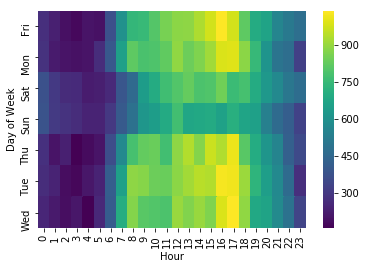

In [44]:
sns.heatmap(dayHour,  cmap = 'viridis')

** Now creating a clustermap using this DataFrame. **

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [46]:
df.groupby(['Day of Week', 'Month']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day of Week Month                                                               
Fri         1      1970  1970  1970  1736   1970       1970  1970  1955  1970   
            2      1581  1581  1581  1362   1581       1581  1581  1566  1581   
            3      1525  1525  1525  1332   1525       1525  1523  1519  1525   
            4      1958  1958  1958  1684   1958       1958  1958  1948  1958   
            5      1730  1730  1730  1504   1730       1730  1730  1720  1730   
            6      1649  1649  1649  1429   1649       1649  1649  1644  1649   
            7      2045  2045  2045  1811   2045       2045  2045  2040  2045   
            8      1310  1310  1310  1123   1310       1310  1310  1306  1310   
            12     1065  1065  1065   906   1065       1065  1064  1060  1065   
Mon         1      1727  1727  1727  1506   1727       1727  1727  1717  1727   
            2      1964  1964  1964  1658   1964       1964  1964  1958  1964   
            3      1535  1535  1535  1364   1535       1535  1533  1530  1535   
            4      1598  1598  1598  1401   1598       1598  1597  1594  1598   
            5      1779  1779  1779  1547   1779       1779  1779  1775  1779   
            6      1617  1617  1617  1397   1617       1617  1617  1611  1617   
            7      1692  1692  1692  1473   1692       1692  1692  1689  1692   
            8      1511  1511  1511  1316   1511       1511  1509  1500  1511   
            12     1257  1257  1257  1101   1257       1257  1256  1253  1257   
Sat         1      2291  2291  2291  1987   2291       2291  2290  2248  2291   
            2      1441  1441  1441  1240   1441       1441  1440  1435  1441   
            3      1266  1266  1266  1110   1266       1266  1264  1263  1266   
            4      1734  1734  1734  1512   1734       1734  1732  1731  1734   
            5      1444  1444  1444  1265   1444       1444  1444  1440  1444   
            6      1388  1388  1388  1203   1388       1388  1388  1378  1388   
            7      1695  1695  1695  1507   1695       1695  1695  1692  1695   
            8      1099  1099  1099   956   1099       1099  1099  1087  1099   
            12      978   978   978   832    978        978   978   960   978   
Sun         1      1960  1960  1960  1729   1960       1960  1960  1951  1960   
            2      1229  1229  1229  1059   1229       1229  1229  1223  1229   
            3      1102  1102  1102   974   1102       1102  1100  1099  1102   
...                 ...   ...   ...   ...    ...        ...   ...   ...   ...   
            7      1672  1672  1672  1440   1672       1672  1672  1665  1672   
            8      1021  1021  1021   878   1021       1021  1021  1016  1021   
            12      907   907   907   805    907        907   907   904   907   
Thu         1      1584  1584  1584  1387   1584       1584  1584  1578  1584   
            2      1596  1596  1596  1392   1596       1596  1596  1583  1596   
            3      1900  1900  1900  1648   1900       1900  1900  1889  1900   
            4      1601  1601  1601  1391   1601       1601  1601  1591  1601   
            5      1590  1590  1590  1387   1590       1590  1590  1586  1590   
            6      2065  2065  2065  1800   2065       2065  2065  2055  2065   
            7      1646  1646  1646  1447   1646       1646  1646  1643  1646   
            8      1230  1230  1230  1038   1230       1230  1227  1225  1230   
            12     1266  1266  1266  1090   1266       1266  1265  1258  1266   
Tue         1      1973  1973  1973  1699   1973       1973  1973  1960  1973   
            2      1753  1753  1753  1535   1753       1753  1753  1745  1753   
            3      1884  1884  1884  1647   1884       1884  1884  1874  1884   
            4      1430  1430  1430  1255   1430       1430  1430  1422  1430   
            5      1918  1918  1918  1660   1918   

In [47]:
df.groupby(['Day of Week', 'Month']).count()['Reason']

Day of Week  Month
Fri          1        1970
             2        1581
             3        1525
             4        1958
             5        1730
             6        1649
             7        2045
             8        1310
             12       1065
Mon          1        1727
             2        1964
             3        1535
             4        1598
             5        1779
             6        1617
             7        1692
             8        1511
             12       1257
Sat          1        2291
             2        1441
             3        1266
             4        1734
             5        1444
             6        1388
             7        1695
             8        1099
             12        978
Sun          1        1960
             2        1229
             3        1102
                      ... 
             7        1672
             8        1021
             12        907
Thu          1        1584
             2        1596
         

In [48]:
dayMonth = df.groupby(['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


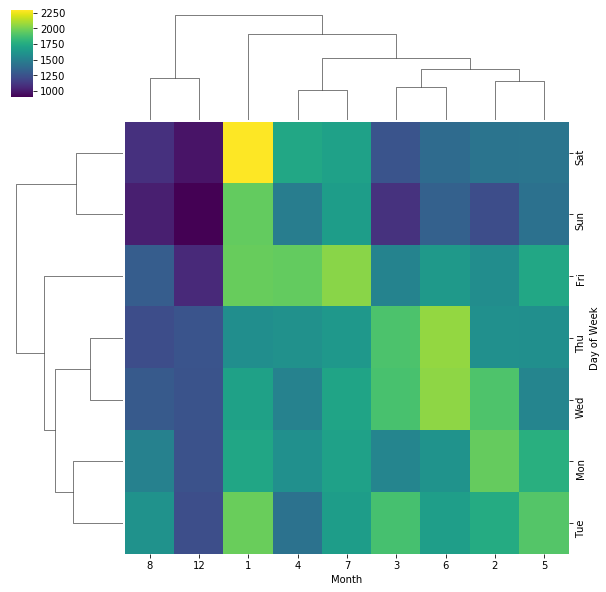

In [49]:
sns.clustermap(dayMonth, cmap = 'viridis')